# Análise de ocorrências de meteoritos pelo mundo durante os últimos anos

## Importando bibliotecas necessárias

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl

## Leitura do Dataset

In [5]:
df = pd.read_excel('meteorite_landings.xlsx')

df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


## Organizando dados
Ano x Qtd. de meteoritos

In [6]:
d = df['year'].value_counts()
d.head()

year
2003.0    3323
1979.0    3046
1998.0    2697
2006.0    2456
1988.0    2296
Name: count, dtype: int64

In [7]:
met = pd.DataFrame({'ano': d.index, 'cont': d.values}).sort_values(by='ano')
met.head()

,ano,cont
247,860.0,1
234,920.0,1
232,1399.0,1
253,1490.0,1
231,1491.0,1


In [8]:
met = met[(met['ano'] > 1958) & (met['ano'] < 2013)]
met.head()

,ano,cont
90,1959.0,16
57,1960.0,30
60,1961.0,27
49,1962.0,36
51,1963.0,34


## Criando gráfico de linhas
Ano x Qtd. de meteoritos

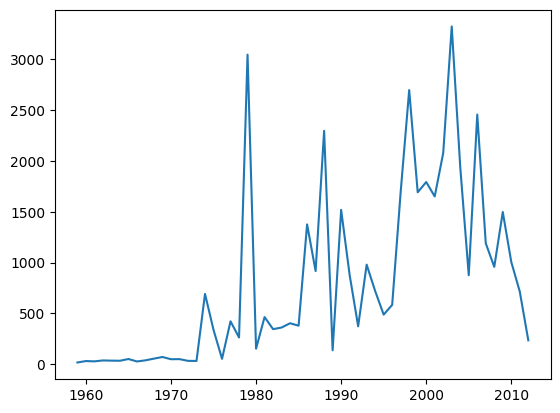

In [9]:
plt.plot(met['ano'], met['cont'])
plt.show()

### Editando o gráfico

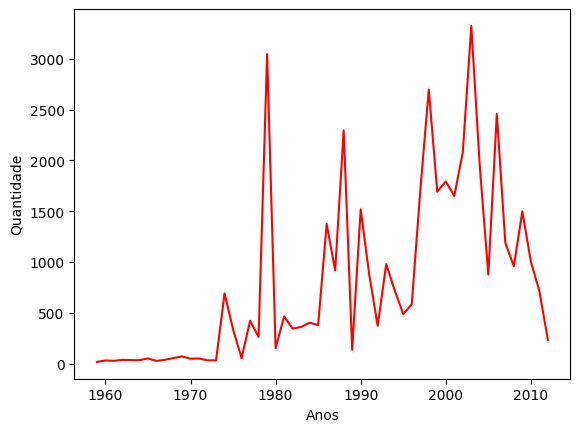

In [10]:
plt.xlabel('Anos')
plt.ylabel('Quantidade')
plt.plot(met['ano'], met['cont'], color='red')
plt.show()

## Organizando dados
Categorias de meteoritos x Média da massa dos meteoritos

In [11]:
barras = df.groupby(by='recclass').agg({'mass (g)': 'mean', 'id': 'count'}).reset_index()
barras.head()

,recclass,mass (g),id
0,Acapulcoite,490.424407,54
1,Acapulcoite/Lodranite,31.793333,6
2,Acapulcoite/lodranite,44.933333,3
3,Achondrite-prim,1078.000000,9
4,Achondrite-ung,895.845614,57


In [12]:
barras = barras[barras['id'] > 300]
barras.head()

,recclass,mass (g),id
44,CM2,368.379616,416
46,CO3,510.319955,335
135,H3,796.078378,386
175,H4,997.419550,4211
182,H4/5,1601.557909,428


## Visualização em gráfico de barras
Categorias de meteoritos x Média da massa dos meteoritos

<BarContainer object of 13 artists>

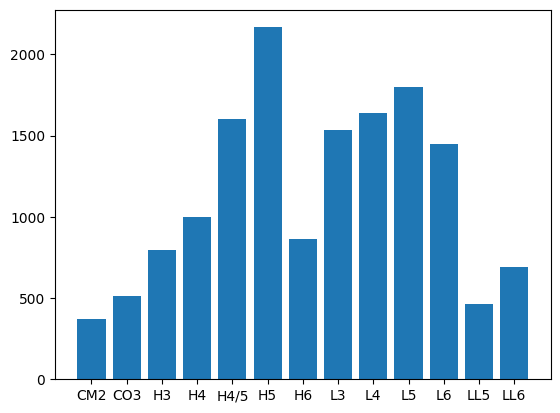

In [13]:
plt.bar(barras['recclass'], barras['mass (g)'])

### Editando o gráfico e mostrando os valores de média para cada barra

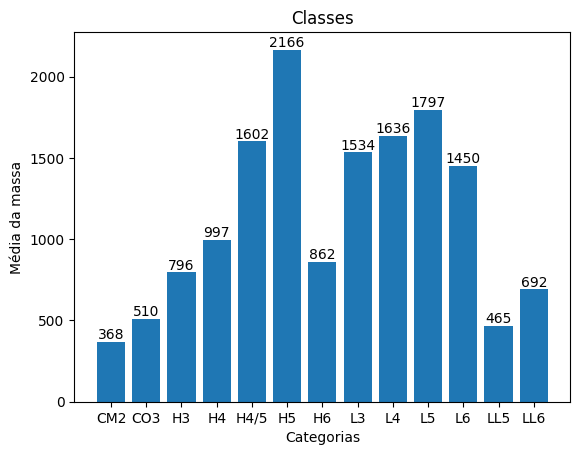

In [17]:
_, ax = plt.subplots()
bar_container = ax.bar(barras['recclass'], barras['mass (g)'])
ax.set(ylabel='Média da massa', xlabel='Categorias', title='Classes')
ax.bar_label(bar_container, fmt='{:.0f}')
plt.show()

### Visualização em barras horizontais

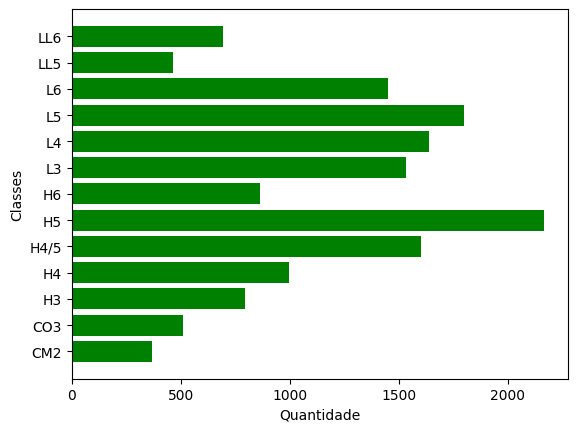

In [21]:
plt.xlabel('Quantidade')
plt.ylabel('Classes')
plt.barh(barras['recclass'], barras['mass (g)'], color='green')
plt.show()

## Visuzalização em gráfico de dispersão
Longitude x Latitude

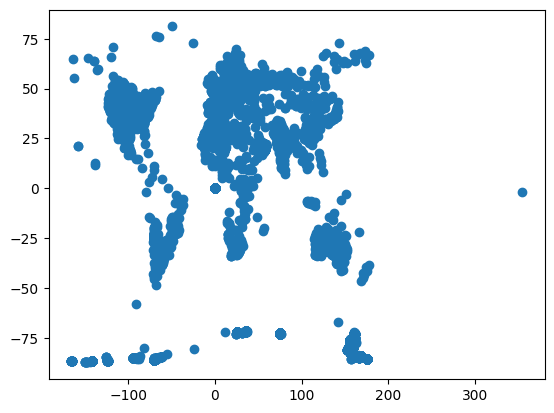

In [19]:
plt.scatter(df['reclong'], df['reclat'])

### Removendo possível outlier

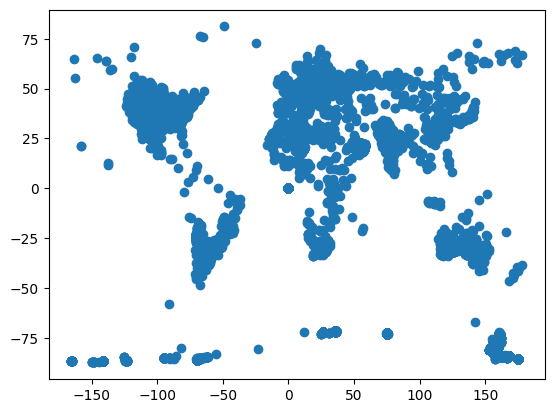

In [22]:
df_new = df[df['reclong'] < 300]
plt.scatter(df_new['reclong'], df_new['reclat'])
plt.show()

### Editando o gráfico

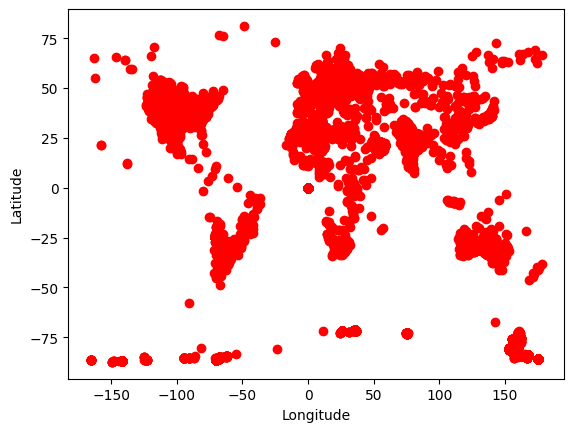

In [24]:
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(df_new['reclong'], df_new['reclat'], color='red')
plt.show()

### Salvando figura do mapa de meteoritos

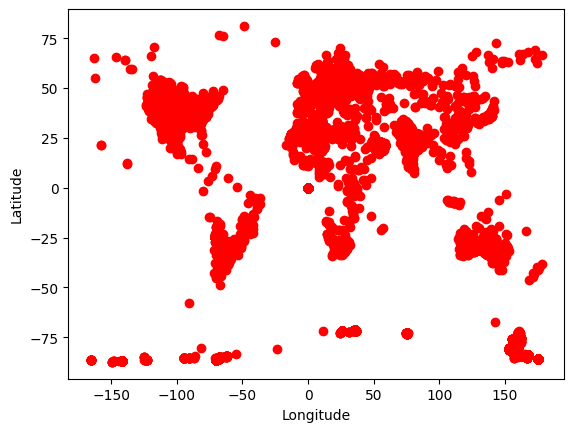

In [25]:
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(df_new['reclong'], df_new['reclat'], color='red')
plt.savefig('mapa_dos_meteoritos.jpg')